# Práctica Semanal 1

## El objetivo de esta práctica es realizar ejemplos básicos popuestos por el libro "Numerical Methods in Engineering with Python3" de J. Kiusalaas <br><br> 
<img src="http://drive.google.com/uc?export=view&id=1oOMw7TaDT3sEErxkeYs0JdykME8ETwCK">

### Los ejercicios que realizaremos son los siguientes:
- Variables, strings, tuples, listas.
- Operadores aritméticos y operadores de comparación.
- Condicionales.
- Loops.
- Conversión de tipo.
- Funciones matemáticas.
- Input/Output.
- Abrir/Cerrar un archivo.
- Control de errores

Leemos un archivo tipo txt e iteramos su contenido línea por línea, obteniendo las columnas que nos interesan para crear un diccionario.

En caso de que nuestro archivo no exista, cachamos el error y devolmemos un mensaje 

In [194]:
#definimos unas listas donde guardar nuestros valores
ticket = []
carrier = []
track = []
#en caso de un error al leer el archivo, cachamos el error e imprimimos un mensaje
try:
    with open("test.txt", 'r', encoding='utf8') as f:
        lines = f.readlines()[5:]
        for line in lines:
            ticket.append(line[12:23])
            carrier.append(line[181:194])
            track.append(line[194:230])
except Exception as e:
        print ('Error occurred:\n' + str(e))            

Limpiamos nuestras listas removiendo los espacios en blanco mediante una función que hemos creado

In [195]:
#función que recibe una lista de tipo string y remueve los espacios en blanco que tenga cada elemento y regresa una lista
def strip_list(l):
    return[x.strip() for x in l]

In [196]:
#mandamos a llamar a nuestra función
ticket = strip_list(ticket)
carrier = strip_list(carrier)
track = strip_list(track)

Unimos nuestras listas para crear un diccionario con el ticket como llave y carrier y track como valores

In [197]:
#unimos tres listas para crear un diccionario
dic = dict(zip(ticket, zip(carrier, track)))

Así luce nuestro diccionario

In [198]:
print("Diccionario:")
print(dic)

Diccionario:
{'56620283': ('PURO', 'PUROLATOR-GRH000275944'), '56620060': ('PURO', 'PUROLATOR-GRH000275952'), '56619439': ('PURO', 'PUROLATOR-GRH000275969'), '56620068': ('PURO', 'PUROLATOR-GRH000275992'), '56619945': ('PURO', 'PUROLATOR-GRH000275819'), '56619810': ('OTHER', 'FLASH ORDER# IS : 107918'), '56617926': ('OTHER', 'EMO-HOLD-FIX'), '56620184': ('UPS', '1Z78E26E0253054091'), '56619467': ('OTHER', 'FLASH ORDER# IS : 107913'), '56618852': ('OTHER', 'EMO-HOLD-FIX'), '56619376': ('OTHER', 'FLASH ORDER# IS : 107912'), '56619954': ('UPS', '1Z78E26E0153060497'), '56619814': ('UPS', '1Z78E26E0253053832'), '56620229': ('PULT', '332233363891'), '56618800': ('OTHER', 'EMO-HOLD-FIX'), '56620243': ('UPS', '1Z78E26E0153058759'), '56620261': ('UPS', '1Z78E26E0153054459'), '56619450': ('OTHER', 'EMO-HOLD-FIX'), '56619805': ('UPS', '1Z78E26E0253056795'), '56620213': ('UPS', '1Z78E26E0253054144'), '56620437': ('PURO', 'PUROLATOR-GRH000275876'), '56620417': ('PURO', 'PUROLATOR-GRH000275839'), '5

Vamos a eliminar del diccionario aquellos elementos cuyo valor no sea UPS, ya que nuestro diccionario tiene dos campos de valor, debemos acceder al primer valor con el índice 0

In [199]:
#recorremos nuestro diccionario y eliminamos los elementos cuyo valor no sea 'UPS'
for key, value in dict(dic).items():
        if value[0] != 'UPS':
            del dic[key]

In [200]:
print("Diccionario:")
print(dic)

Diccionario:
{'56620184': ('UPS', '1Z78E26E0253054091'), '56619954': ('UPS', '1Z78E26E0153060497'), '56619814': ('UPS', '1Z78E26E0253053832'), '56620243': ('UPS', '1Z78E26E0153058759'), '56620261': ('UPS', '1Z78E26E0153054459'), '56619805': ('UPS', '1Z78E26E0253056795'), '56620213': ('UPS', '1Z78E26E0253054144')}


Vamos a cambiar el tipo de la llave de str a int

In [201]:
#solo vamos a convertir el valor de las llaves
dic = {int(k):[i for i in v] for k,v in dic.items()}

In [202]:
dic

{56620184: ['UPS', '1Z78E26E0253054091'],
 56619954: ['UPS', '1Z78E26E0153060497'],
 56619814: ['UPS', '1Z78E26E0253053832'],
 56620243: ['UPS', '1Z78E26E0153058759'],
 56620261: ['UPS', '1Z78E26E0153054459'],
 56619805: ['UPS', '1Z78E26E0253056795'],
 56620213: ['UPS', '1Z78E26E0253054144']}

De esta manera podemos realizar algunas funciones matematicas sobre las llaves como max, min, etc

In [203]:
print("El maximo valor de las llaves es: " + str(max(dic)))

El maximo valor de las llaves es: 56620261


In [204]:
print("El minimo valor de las llaves es: " + str(min(dic)))

El minimo valor de las llaves es: 56619805


Finalmente vamos a escribir nuestro diccionario a un nuevo archivo de texto llamado UPS

In [205]:
#Debido a que no podemos escribir directamente nuestro direccionario a un archivo, antes debemos serializarlo con la ayuda de la librería json
import json

#en caso de que no podamos hacer la escritura al archivo, mcachamos la excepción e imprimimos un mensaje
try:
    with open('UPS.txt', 'w') as f:
        f.write(json.dumps(dic))
except Exception as e:
        print ('Error occurred:\n' + str(e))   

### Acontinuacion realizaremos los siguientes ejercicios:
- Módulo numpy.
- Gráficas con matplotlib.pyplot.
- Scope de variables.
- Escritura y ejecución de programas.

Empezaremos por importar las librerías que vamos a utilizar

In [206]:
# seguimos la conveción de renombrar las librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

Para este ejercicio vamos a importar un pequeño dataset con la ayuda de pandas

In [207]:
#obtenemos nuestro dataset de un repositorio público de github
chicken = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/chicken.csv")

In [208]:
print ("Imprimimos las columnas de nuestro dataset")
print (chicken.columns)

Imprimimos las columnas de nuestro dataset
Index(['date', 'value'], dtype='object')


Ya que nuestro dataset solo tiene dos columnas, vamos a gregar una tercera columna, generamos números aleatorios con la ayuda de numpy

In [209]:
#generamos 180 unidades aleatorias entre 80 y 120, cantidad de pollos vendidos
units = np.random.randint(80,120, size=(180))
chicken['units'] = units


Ahora podemos graficar nuestro dataset y buscar patrones y tendencias

### Line plot

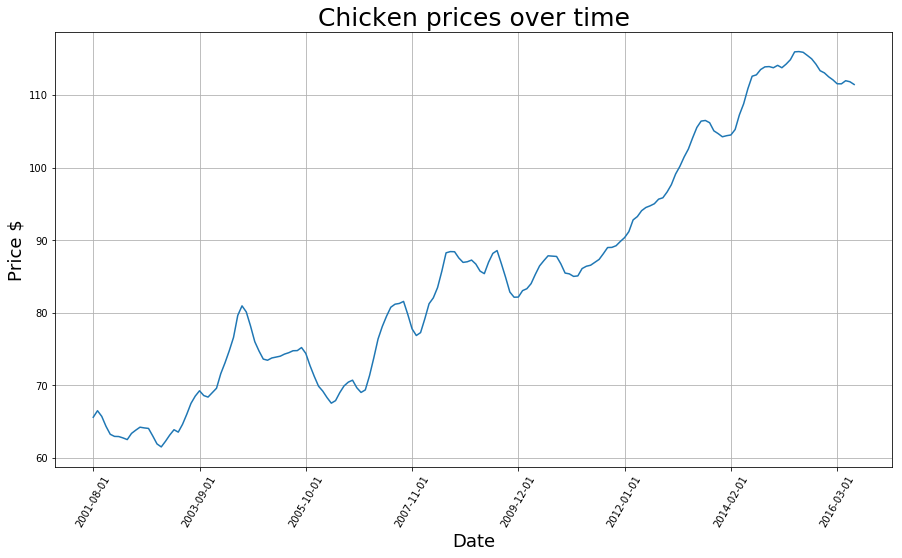

In [213]:
chicken.plot(x = 'date', y = 'value', legend=None)
plt.title('Chicken prices over time', fontsize=25)
plt.xlabel('Date', fontsize=18)
plt.xticks(rotation=60)
plt.ylabel('Price $', fontsize=18)
plt.grid()
plt.rcParams['figure.figsize'] = [15, 8]
plt.show()     

### Histogram plot

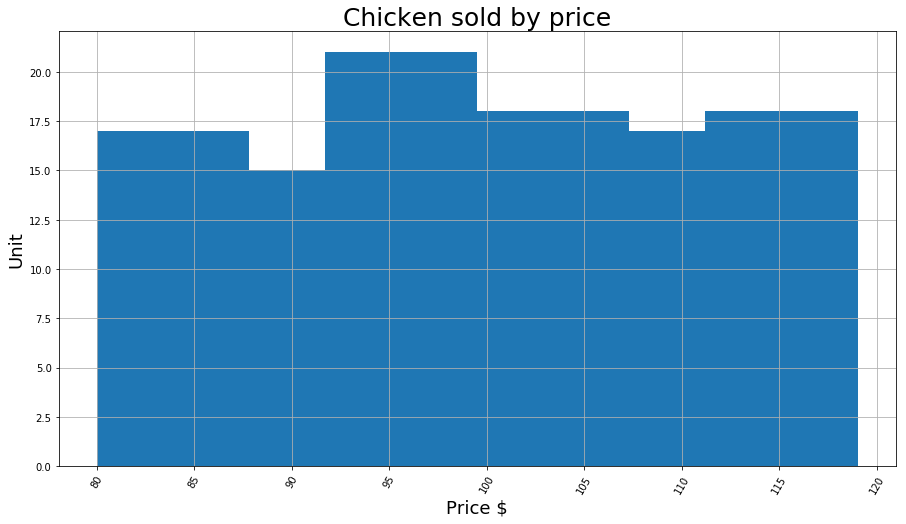

In [211]:
chicken.plot.hist(x = 'value', y = 'units', legend=None)
plt.title('Chicken sold by price', fontsize=25)
plt.xlabel('Price $', fontsize=18)
plt.xticks(rotation=60)
plt.ylabel('Unit', fontsize=18)
plt.rcParams['figure.figsize'] = [15, 8]
plt.grid()
plt.show()     

### Heat map plot

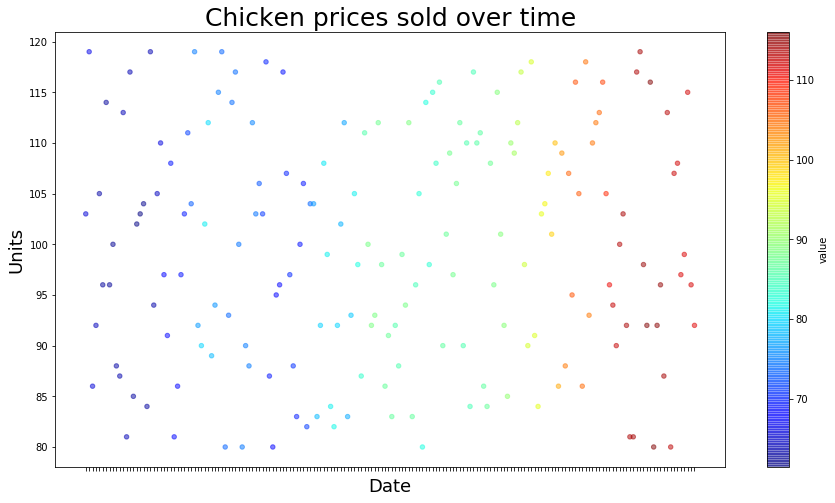

In [212]:
chicken.plot.scatter('date', 'units', c='value', colormap='jet', alpha=0.5).set_xticklabels([])
plt.title('Chicken prices sold over time', fontsize=25)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Units', fontsize=18)
plt.rcParams['figure.figsize'] = [15, 8]
plt.show()     